In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "../data/retail_data_analysis/"
df_sales = pd.read_csv(path + "sales data-set.csv")
df_stores = pd.read_csv(path + "stores data-set.csv")
df_features = pd.read_csv(path+"Features data set.csv")

In [3]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
df_features['Date'] = pd.to_datetime(df_features['Date'],format="%d/%m/%Y")
df_sales['Date'] = pd.to_datetime(df_sales['Date'],format="%d/%m/%Y")

In [11]:
feature_sales = pd.merge(df_features, df_sales, on=['Date','Store'], how='inner')
feature_sales.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False


In [12]:
feature_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday_x   421570 non-null  bool          
 12  Dept          421570 non-null  int64         
 13  Weekly_Sales  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
dtypes: bool(2), datet

In [14]:
sales_trend = feature_sales.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [15]:
def trend_plot(data):
    plt.figure(figsize=(12, 6)) 
    plt.plot(data['Date'], data['Weekly_Sales'], color='green', marker='.',linestyle='-') 
    plt.title('Overall Sales Trend')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()

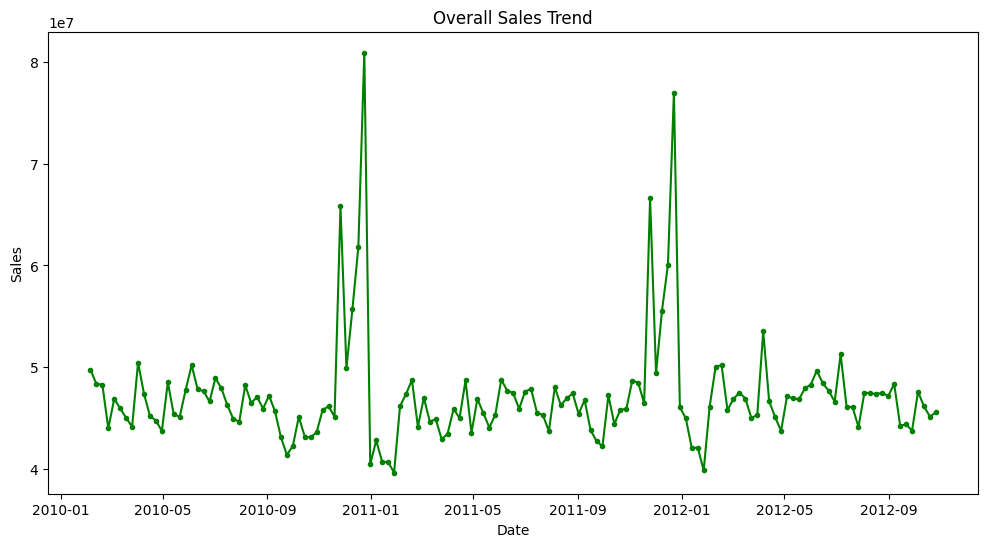

In [16]:
trend_plot(sales_trend)

In [17]:
sales_stores = pd.merge(df_sales, df_stores, on='Store', how='inner')
sales_stores.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [18]:
type_sales = sales_stores.groupby('Type')['Weekly_Sales'].sum().reset_index()
type_sales.head()

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [19]:
def bar_trends(data, xname,yname, title="Sales trend", color='green', size=(8,6), width=0.8):
    plt.figure(figsize=size)
    plt.bar(data[xname], data[yname], color=color, width=width)
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.show()

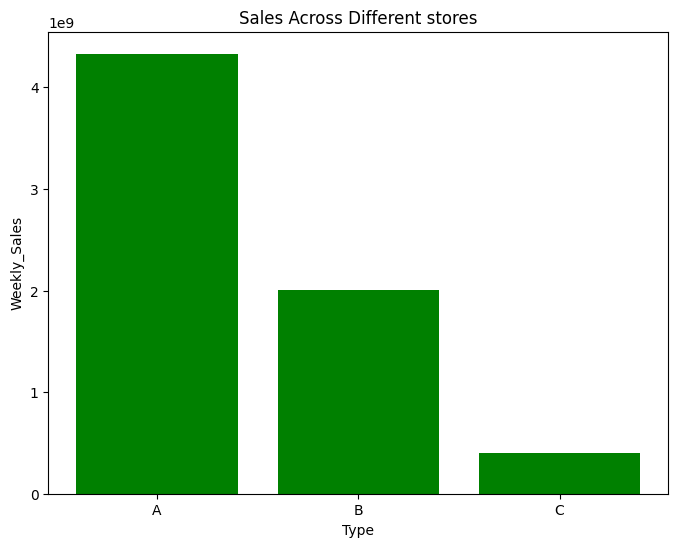

In [20]:
bar_trends(type_sales, 'Type', 'Weekly_Sales', 'Sales Across Different stores')

In [21]:
holiday_sales = df_sales.groupby('IsHoliday')['Weekly_Sales'].sum().reset_index()
holiday_sales.head()

,IsHoliday,Weekly_Sales
0,False,6.231919e+09
1,True,5.052996e+08


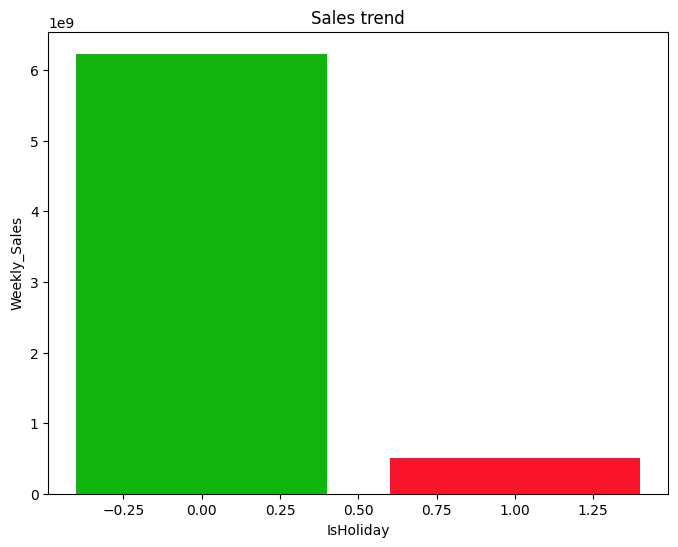

In [22]:
bar_trends(holiday_sales, 'IsHoliday', 'Weekly_Sales', color=['#11b50e', '#fa142b'])

In [23]:
dept_sales = df_sales.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).reset_index()
top_dept = dept_sales.head(10)
top_dept.head(10)

,Dept,Weekly_Sales
0,92,4.839433e+08
1,95,4.493202e+08
2,38,3.931181e+08
3,72,3.057252e+08
4,90,2.910685e+08
5,40,2.889360e+08
6,2,2.806112e+08
7,91,2.167817e+08
8,13,1.973216e+08
9,8,1.942808e+08


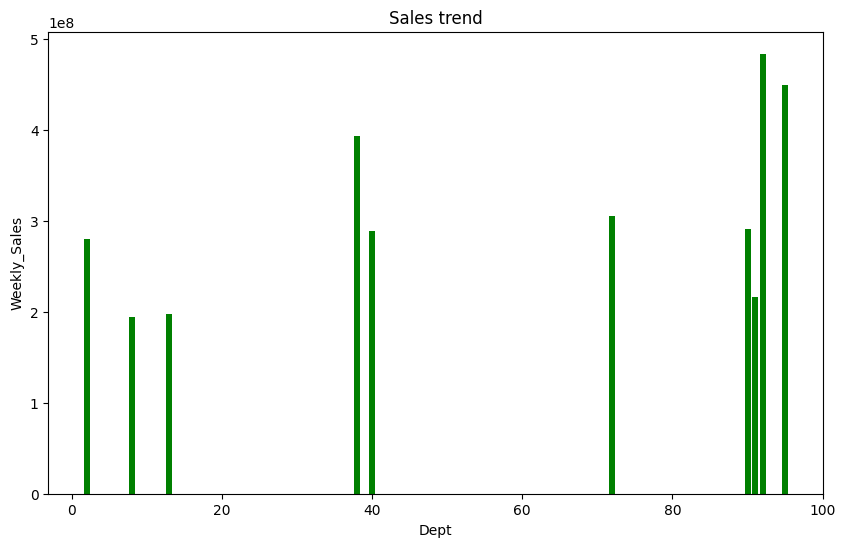

In [24]:
bar_trends(top_dept, 'Dept', 'Weekly_Sales', size=(10,6))

In [25]:
def heatmap_corr(data):
    sns.heatmap(data,
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(50, 500, n=500),
                square=True) 
    plt.show()

In [26]:
sales_size = sales_stores.groupby('Size')['Weekly_Sales'].sum().reset_index()
sales_size.head()

,Size,Weekly_Sales
0,34875,4.547569e+07
1,37392,5.758674e+07
2,39690,1.718856e+08
3,39910,1.709080e+08
4,41062,9.056544e+07


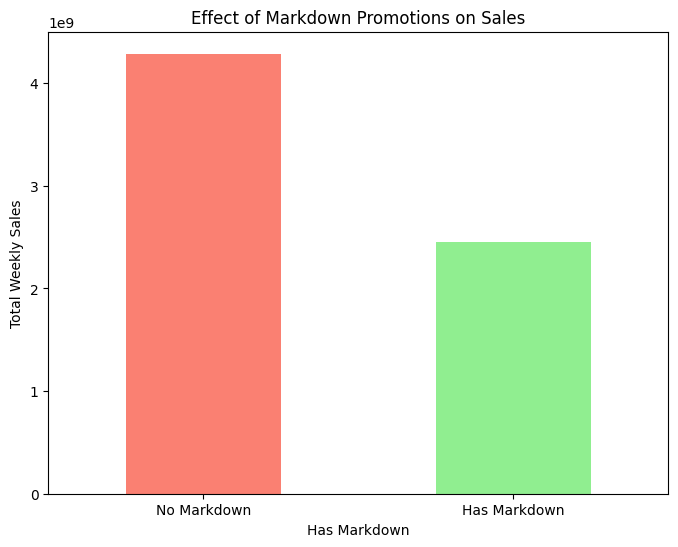

In [27]:
feature_sales['Has_Markdown'] = feature_sales[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].notna().any(axis=1)

markdown_sales = feature_sales.groupby('Has_Markdown')['Weekly_Sales'].sum()

markdown_sales.plot(kind='bar', figsize=(8, 6), color=['salmon', 'lightgreen'])
plt.title('Effect of Markdown Promotions on Sales')
plt.xlabel('Has Markdown')
plt.ylabel('Total Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['No Markdown', 'Has Markdown'], rotation=0)
plt.show()